## Profiles global averages with extra cases

In [1]:
from sect_sens.util.plot import plot_profiles

from sect_sens.util.naming_conventions import var_info

from sect_sens.util.imports import get_averaged_fields

from IPython import get_ipython
from useful_scit.imps import (plt)
from matplotlib.lines import Line2D
import seaborn as sns

from sect_sens.data_info.simulation_types import get_diff_by_type, get_casen_by_type_mod
from sect_sens.util.imports import get_averaged_fields
from sect_sens.util.naming_conventions.var_info import get_fancy_var_name, get_fancy_unit_xr
from sect_sens.util.plot.colors import get_case_col
from sect_sens.util.plot.plot_maps import plot_map_diff, plot_map

from sect_sens.constants import get_plotpath, path_data_info
from sect_sens.util.practical_functions import make_folders
import cartopy.crs as ccrs
from matplotlib import gridspec
from matplotlib import colors

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/data_info/area_defs.csv
/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/data_info/
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Div settings:

In [2]:
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

In [3]:
model = 'NorESM'

startyear = '0004-01'
endyear = '0005-12'

## Cases

In [4]:
cases_sec = [
    'NF1850_SECT_ctrl',
    'NF1850_aeroxid2014_SECT_ctrl',
    'NF1850_SECT_elvoc_smax',
    'NF1850_aeroxid2014_SECT_elvoc_smax',
    'NF1850_SECT_svoc_smax',
    'NF1850_aeroxid2014_SECT_svoc_smax',

]
cases_orig = [
    'NF1850_noSECT_def',
    'NF1850_aeroxid2014_noSECT_def',
    'NF1850_aeroxid2014_noSECT_ox_ricc',
    'NF1850_noSECT_ox_ricc',
    #'NF1850_noSECT_ox_gord',
    #'NF1850_aeroxid2014_noSECT_ox_ricc_test_gordon',
]

cases = cases_orig + cases_sec

## Filenames

In [5]:
version = 'pi_pd_prof_elsvoc'
plot_path = get_plotpath('prof')
filen_base = plot_path + '/%s' % version
# print(plot_path)
make_folders(plot_path)

In [6]:
varl = ['NCONC01', 'N_AER', 'AWNC_incld', 'AREL_incld','SOA_NA','SO4_NA']#, 'CDNUMC',
        #'SWCF_Ghan', 'LWCF_Ghan', 'NCFT_Ghan']
subfig_size = 2.9
asp_ratio = .9
print(varl)

['NCONC01', 'N_AER', 'AWNC_incld', 'AREL_incld', 'SOA_NA', 'SO4_NA']


## Load data:

In [7]:
from useful_scit.imps import *

area='Global'
log.ger.setLevel(log.log.DEBUG)

prof_dic = get_averaged_fields.get_profiles(cases, varl, startyear, endyear, area=area,
                                            pressure_adjust=pressure_adjust)

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/NCONC01_0004-01-0005-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/N_AER_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/AWNC_incld_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/AREL_incld_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/SOA_NA_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/SO4_NA_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_aeroxid2014_noSECT_def/Global/NCONC01_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//No

In [8]:
endyear

'0005-12'

In [9]:
import pandas as pd
from pathlib import Path
case_types = ['PI', 'PD']
mod_types = ['OsloAeroSec','OsloAeroSec$_{elvoc}$','OsloAeroSec$_{svoc}$','OsloAero$_{imp}$','OsloAero$_{def}$'][::-1]#'OsloAeroSec$_{gord}$','OsloAero$_{gord}$''OsloAero$_{imp}$', 
mod_types = ['OsloAeroSec','OsloAeroSec$_{elvoc}$','OsloAeroSec$_{svoc}$']#[::-1]#'OsloAeroSec$_{gord}$','OsloAero$_{gord}$''OsloAero$_{imp}$', 
cdic = {key: get_case_col(key) for key in mod_types}  # , ['r','g','b'])}

## Plot function: 

In [10]:
def plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
                       cases_types=None,
                       title=''):
    #var='NCONC01'
    #xscale='log'
    #yscale='log'
    #ylim=[1e3, 100]
    #pressure_coords=True
    #title=''
    if cases_types is None:
        cases_types = case_types
        PI = cases_types[0]
        PD = cases_types[1]
    if ylim is None:
        ylim = [1e3, 100]
    if ax is None:
        fig, ax = plt.subplots(1, figsize=[3.5,3.5])
    hndls=[]
    for mty in mod_types:
        print(mty)
        case_PI= get_casen_by_type_mod(PI,mty)
        case_PIPDaer= get_casen_by_type_mod(PD,mty)
        print(case_PIPDaer)
        daPI = prof_dic[case_PI][var]
        daPIPD = prof_dic[case_PIPDaer][var]
        h = plt.fill_betweenx(daPI.lev,daPI, daPIPD, color = cdic[mty],
                        label=mty,
                          alpha=.4
                              )
        hndls.append(h)
    for mty in mod_types:
        case_PI= get_casen_by_type_mod(PI,mty)
        case_PIPDaer= get_casen_by_type_mod(PD,mty)
        daPI = prof_dic[case_PI][var]
        daPIPD = prof_dic[case_PIPDaer][var]

        daPI.plot(  y='lev',ax=ax, color=cdic[mty])
        daPIPD.plot(y='lev',ax=ax, linestyle='dashed',color=cdic[mty],)

        #plot_profile(da, ax, xscale='log', yscale='log', label='', ylim=[1e3, 100], pressure_coords=True, kwargs={},
        #             title='')
    ax.set_ylim(ylim)
    if len(title) > 0:
        ax.set_title(title)
    if pressure_coords:
        ax.set_ylabel('Pressure [hPa]')
    xlabel = get_fancy_var_name(var) + ' [%s]' % var_info.get_fancy_unit_xr(daPI,
                                                                                                              var)
    ax.set_xlabel(xlabel)
    #ax.grid(True, which='both')
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)
    first_leg= plt.legend(handles=hndls, loc=1, frameon=False)
    ax_l = plt.gca().add_artist(first_leg)
    custom_lines = [Line2D([0], [0], color='k'),
                    Line2D([0], [0], color='k', linestyle='dashed'),]
    plt.legend(custom_lines, [PI, PD], loc='lower right', frameon=False)
    sns.despine(ax.get_figure(), ax)
    plot_profiles.set_scalar_formatter(ax)
    return ax

## Plots:

OsloAeroSec
NF1850_aeroxid2014_SECT_ctrl
OsloAeroSec$_{elvoc}$
NF1850_aeroxid2014_SECT_elvoc_smax
OsloAeroSec$_{svoc}$
NF1850_aeroxid2014_SECT_svoc_smax


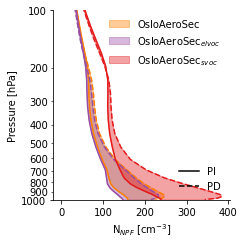

In [11]:
var = 'NCONC01'
ax = plt_pipd_diff_prof(var, prof_dic,
                        
                        ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
#plt.savefig(fin+'.pdf', dpi=300)
plt.show()

OsloAero$_{def}$
NF1850_aeroxid2014_noSECT_def
OsloAero$_{imp}$
NF1850_aeroxid2014_noSECT_ox_ricc
OsloAeroSec$_{svoc}$
NF1850_aeroxid2014_SECT_svoc_smax
OsloAeroSec$_{elvoc}$
NF1850_aeroxid2014_SECT_elvoc_smax
OsloAeroSec
NF1850_aeroxid2014_SECT_ctrl


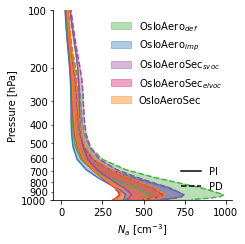

In [12]:
var = 'N_AER'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
                        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
#plt.savefig(fin+'.pdf', dpi=300)
plt.show()

OsloAero$_{def}$
NF1850_aeroxid2014_noSECT_def
OsloAero$_{imp}$
NF1850_aeroxid2014_noSECT_ox_ricc
OsloAeroSec$_{svoc}$
NF1850_aeroxid2014_SECT_svoc_smax
OsloAeroSec$_{elvoc}$
NF1850_aeroxid2014_SECT_elvoc_smax
OsloAeroSec
NF1850_aeroxid2014_SECT_ctrl


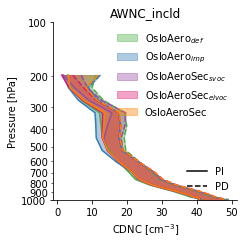

In [13]:
var = 'AWNC_incld'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
                        title=var)
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

OsloAero$_{def}$
NF1850_aeroxid2014_noSECT_def
OsloAero$_{imp}$
NF1850_aeroxid2014_noSECT_ox_ricc
OsloAeroSec$_{svoc}$
NF1850_aeroxid2014_SECT_svoc_smax
OsloAeroSec$_{elvoc}$
NF1850_aeroxid2014_SECT_elvoc_smax
OsloAeroSec
NF1850_aeroxid2014_SECT_ctrl


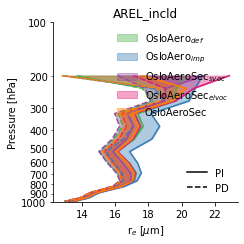

In [14]:
var = 'AREL_incld'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
                        title=var)
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

OsloAero$_{def}$
NF1850_aeroxid2014_noSECT_def
OsloAero$_{imp}$
NF1850_aeroxid2014_noSECT_ox_ricc
OsloAeroSec$_{svoc}$
NF1850_aeroxid2014_SECT_svoc_smax
OsloAeroSec$_{elvoc}$
NF1850_aeroxid2014_SECT_elvoc_smax
OsloAeroSec
NF1850_aeroxid2014_SECT_ctrl


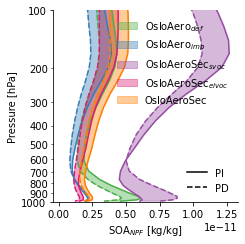

In [15]:
var = 'SOA_NA'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
                        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

OsloAero$_{def}$
NF1850_aeroxid2014_noSECT_def
OsloAero$_{imp}$
NF1850_aeroxid2014_noSECT_ox_ricc
OsloAeroSec$_{svoc}$
NF1850_aeroxid2014_SECT_svoc_smax
OsloAeroSec$_{elvoc}$
NF1850_aeroxid2014_SECT_elvoc_smax
OsloAeroSec
NF1850_aeroxid2014_SECT_ctrl


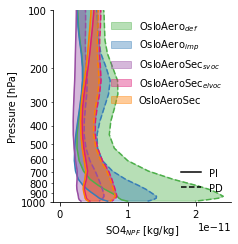

In [16]:
var = 'SO4_NA'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
                        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()